#### Imports

In [1]:
# Visualization
import matplotlib.pyplot as plt

# Builtin
from pathlib import Path
import sys
import os
import pdb

# Add repo path to system path for additional imports. 
# Note the relative depth from this notebook to system repo
# in case you want to move this file

nb_path = str(Path(os.path.abspath('')).parent.parent)
sys.path.insert(0, nb_path)
print(f'Added {nb_path} to system path')

# This computer git repos
from project.project_manager_module import ProjectManager

Added C:\Users\Simo\Laskenta\Git_Repos\SystemTools to system path


#### Build paths
<font color=red>**Set the root_path to your SystemTools/scripts**</font>

In [2]:
#root_path = r"/opt2/Git_Repos/SystemTools/scripts/"
root_path = r"C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts/"

In [3]:
project = "FCN22"  
experiment = "Figure4"  
experiment_path = Path.joinpath(Path(root_path), Path(project), experiment)

#### Data context for multiple analyzes and visualizations

In [4]:
to_spa_dict = {
    "startpoints": ["Comrad", "Bacon", "Hifi"],
    "parameters": ["C", "gL", "EL", "VT", "delay"],
    "analyzes": [
        "Coherence",
        "Granger Causality",
        "Transfer Entropy",
        "Simulation Error",
    ],
}

#### Call project manager
Code complexity is hidden behind the ProjectManager

In [5]:
PM = ProjectManager(
    path=experiment_path,
    input_folder="../in",
    output_folder="",
    matlab_workspace_file="",
    conn_skeleton_file_in="",
    conn_file_out="",
    input_filename="",
    NG_name="NG3_L4_SS_L4",
    t_idx_start=2000,
    t_idx_end=-2000,
    to_spa_dict=to_spa_dict,
    project=project,
    experiment=experiment,
)

### Vizualize mean of 10 iterations, results precalculated

In [6]:
# Copy precalculated results to experiment folders
input_folder_list = [
    "precalculated_results/Single_narrow_iteration_R1/Comrad_C_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Bacon_C_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/HiFi_C_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Comrad_gL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Bacon_gL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/HiFi_gL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Comrad_EL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Bacon_EL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/HiFi_EL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Comrad_VT_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Bacon_VT_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/HiFi_VT_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Comrad_delay_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Bacon_delay_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/HiFi_delay_compiled_results", 
    "precalculated_results/optimal_values", 
]
# These will appear under experiment_path
output_folder_list = [
    "Comrad_C_compiled_results",
    "Bacon_C_compiled_results",
    "HiFi_C_compiled_results",
    "Comrad_gL_compiled_results",
    "Bacon_gL_compiled_results",
    "HiFi_gL_compiled_results",
    "Comrad_EL_compiled_results",
    "Bacon_EL_compiled_results",
    "HiFi_EL_compiled_results",
    "Comrad_VT_compiled_results",
    "Bacon_VT_compiled_results",
    "HiFi_VT_compiled_results",
    "Comrad_delay_compiled_results",
    "Bacon_delay_compiled_results",
    "HiFi_delay_compiled_results",
    "optimal_values",
]
for this_input, this_output in zip(input_folder_list, output_folder_list):
    PM.transfer_precalculated_results(input_folder=this_input, output_folder=this_output, verbose=False)

In [7]:
# PM.viz.save_figure_with_arrayidentifier = f'Fig4' # Activate to save figures
PM.viz.save_figure_to_folder = f"Analysis_Figures"
plt.rcParams['figure.figsize'] = (16, 4)

### Figure 4
#### Comparison of information quantities between Comrad, Bacon and HiFi at varying capacitance.

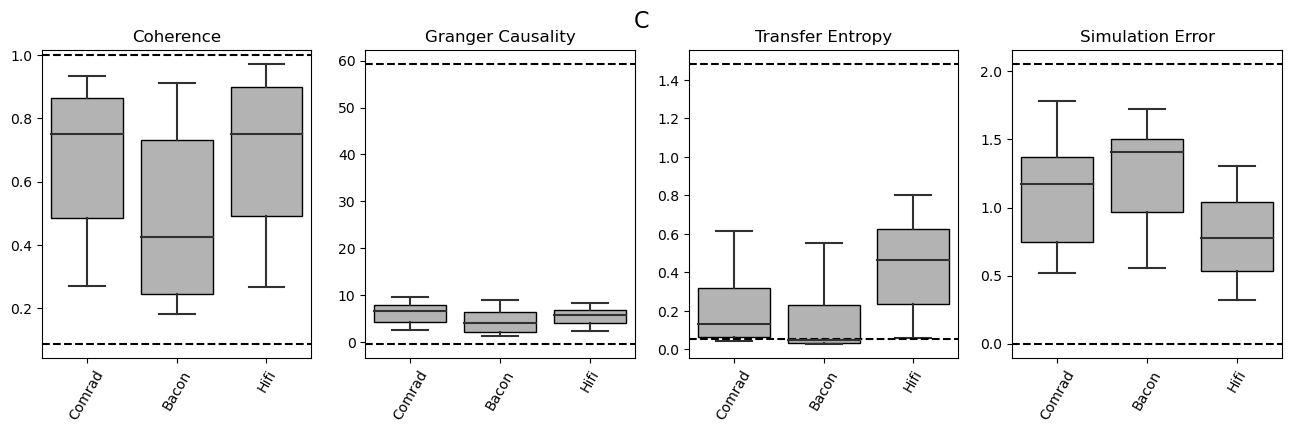

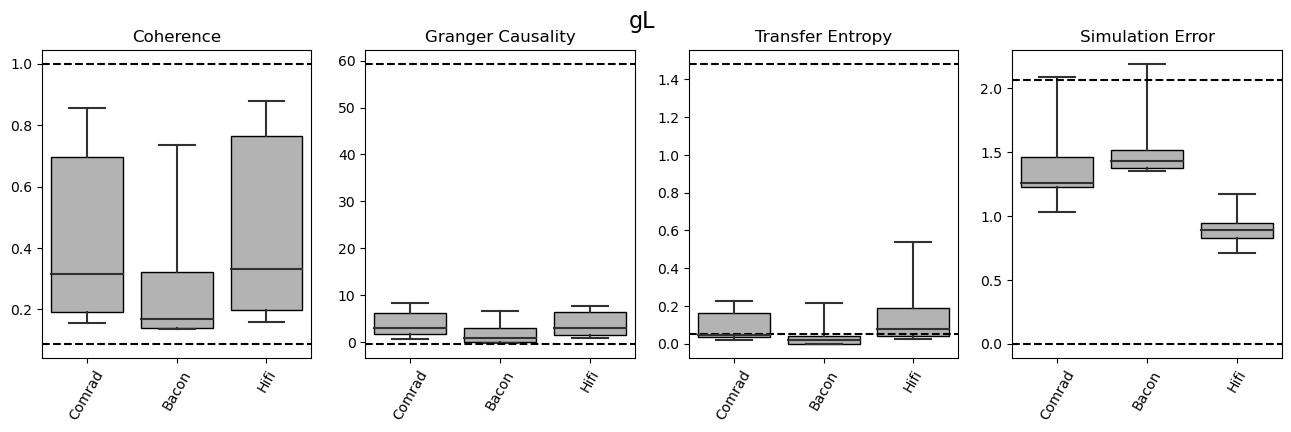

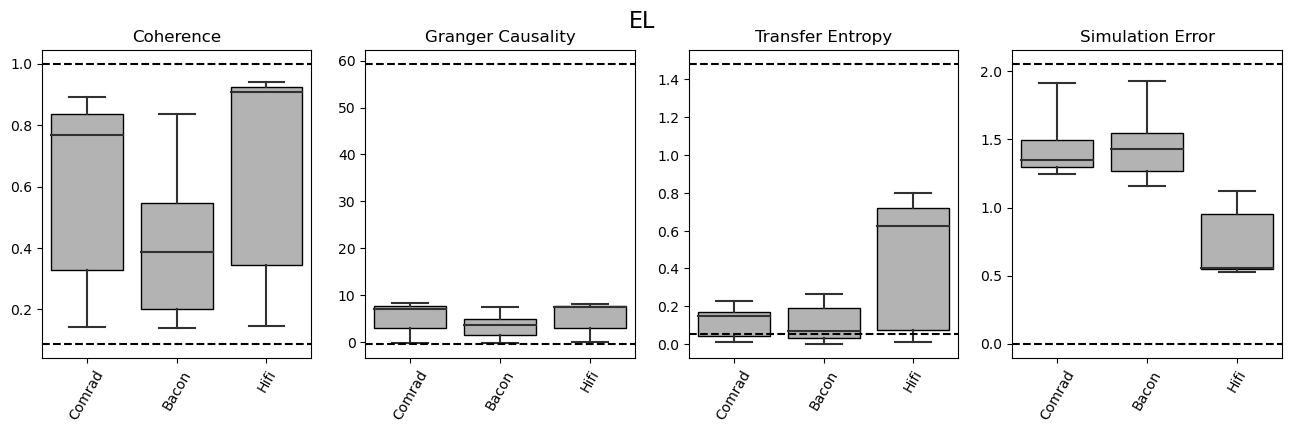

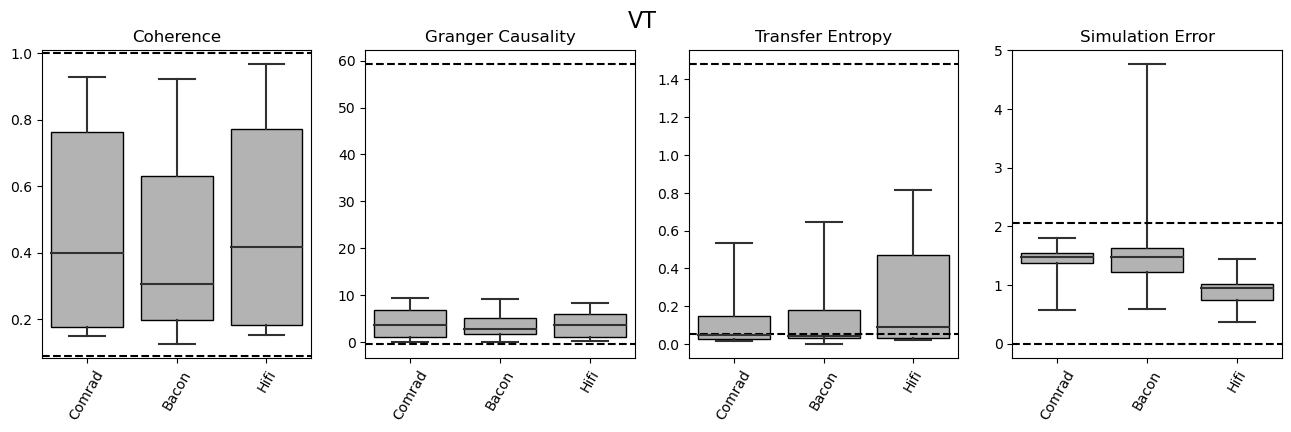

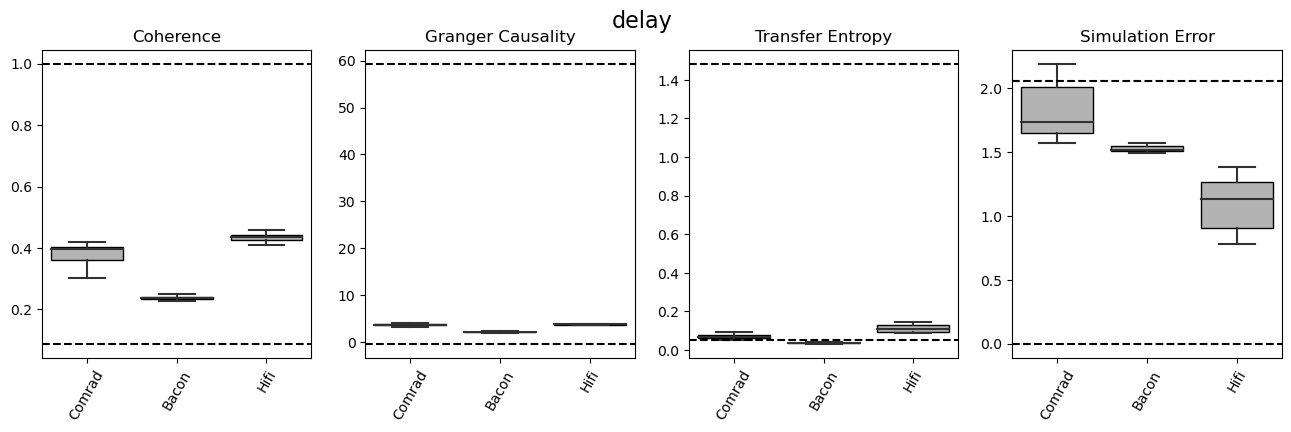

In [8]:
    """
    Definitions for parametric plotting of multiple conditions/categories.
    First, define what data is going to be visualized in to_spa_dict above.
    Second, define how it is visualized in param_plot_dict below.

    Limitations: 
        You cannot have analyzes as title AND inner_sub = True.

    outer : panel (distinct subplots) # analyzes, startpoints, parameters, controls
    inner : inside one axis (subplot) # startpoints, parameters, controls
    inner_sub : bool, further subdivision by value, such as mean firing rate
    inner_sub_ana : name of ana. This MUST be included into to_spa_dict "analyzes"
    plot_type : parametric plot type 

    compiled_results : bool, data at compiled_results folder, mean over iterations

    inner_paths : bool, Provide comparison from arbitrary paths, e.g. controls. The 'inner' is ignored.
    inner_path_names: list of names of paths to compare.
    paths : provide list of tuples of full path parts to data folder. 
    E.g. [(path, 'Single_narrow_iteration_control', 'Bacon_gL_compiled_results'),] 
    The number of paths MUST be the same as the number of corresponding inner variables. 
    """

    param_plot_dict = {
        "title": "parameters", 
        "outer": "analyzes",  
        "inner": "startpoints",  # If "inner_paths" is True, this 'inner' is ignored 
        "inner_sub": False,  # Cannot be activated without additional options
        "plot_type": "box",  # "violin" (2), "box", "strip", "swarm", "boxen", "point", "bar"
        "compiled_results": True, 
        "sharey": False,
        "palette": "Greys",
        "inner_paths": False, # Cannot be activated without additional options, see figure2.ipynb
        "inner_stat_test": False, 
        "save_description": False, # Cannot be activated without additional options
        "display_optimal_values": True, 
        "optimal_value_foldername": "optimal_values",
        "optimal_description_name": "optimal_unfit_description.csv",
    }
    PM.viz.show_catplot(param_plot_dict)